<h1 style="text-align:center;"> Image Classification (binary) Project</h1>

<h2> Problem Statement: </h2><br>
<i>The idea of the project is to develop a model that can effectively classify various objects plying on the roads. We aspire to develop a model which can detect the image distance and return a value in miles</i>


------------------------------------------------------------------------------------------------------------------------------

<h6>Import the required libraries</h6>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


<h6>Build and compile a classifier</h6>

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


<h6>Data Augmentation using ImageDataGenerator</h6>

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('DSP Project/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'binary')

Found 69 images belonging to 2 classes.


In [6]:
valid_set = test_datagen.flow_from_directory('DSP Project/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 3, class_mode = 'binary')

Found 10 images belonging to 2 classes.


------------------------------------------------------------------------------------------------------------------------------

<h6>Train the CNN Classifier</h6>

In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
40/40 [==============================] - 72s 2s/step - loss: 0.7732 - accuracy: 0.5395 - val_loss: 0.6685 - val_accuracy: 0.5385
Epoch 2/5
40/40 [==============================] - 77s 2s/step - loss: 0.6865 - accuracy: 0.6494 - val_loss: 0.3287 - val_accuracy: 0.4583
Epoch 3/5
40/40 [==============================] - 64s 2s/step - loss: 0.6729 - accuracy: 0.6494 - val_loss: 0.5744 - val_accuracy: 0.5000
Epoch 4/5
40/40 [==============================] - 64s 2s/step - loss: 0.5733 - accuracy: 0.7456 - val_loss: 1.3802 - val_accuracy: 0.6250
Epoch 5/5
40/40 [==============================] - 69s 2s/step - loss: 0.4733 - accuracy: 0.8009 - val_loss: 0.4841 - val_accuracy: 0.5000


------------------------------------------------------------------------------------------------------------------------------

<h6>predictions</h6>

In [15]:

prediction_set = test_datagen.flow_from_directory('DSP Project/validation_set', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

Found 5 images belonging to 1 classes.


In [16]:
predictions=classifier.predict(prediction_set)

In [17]:
i=np.random.choice(len(predictions))

This image is predicted as car


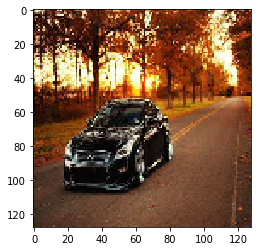

In [18]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","truck" if predictions[i] > 0.5 else "car")

In [20]:

for vehicle in predictions:
    print("car" if vehicle > 0.5 else "truck")

car
truck
truck
car
truck
